<center><h1>Fernandes_Alrik_HW5</h1></center>
<br>
<br>

Name: Alrik Fernandes
<br>
Github Username: AlrikF
<br>
USC ID: 4036859519

## 1. Decision Trees as Interpretable Models

Import packages

In [52]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV,Ridge,LassoCV,Lasso,LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import _tree
from sklearn.pipeline import make_pipeline

### (a) Obtain Data

Get the Accute Inamations Data Set

In [53]:
df = pd.read_csv("../data/diagnosis.data",encoding='UTF_16',names=["temp","nausea","l_pain","urine","m_pain","burn","Inflam","Neph"],sep="\\s+",header=None)
df["temp"]= df["temp"].apply(lambda x:float(x.replace(",",".")))
for col in df.columns[1:]:
    df[col]=df[col].apply(lambda x:x.replace("yes","1"))
    df[col]=df[col].apply(lambda x:int(x.replace("no","0")))
df

,temp,nausea,l_pain,urine,m_pain,burn,Inflam,Neph
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### (b) Build a decision tree

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


[Text(0.4444444444444444, 0.875, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6666666666666666, 0.625, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]')]

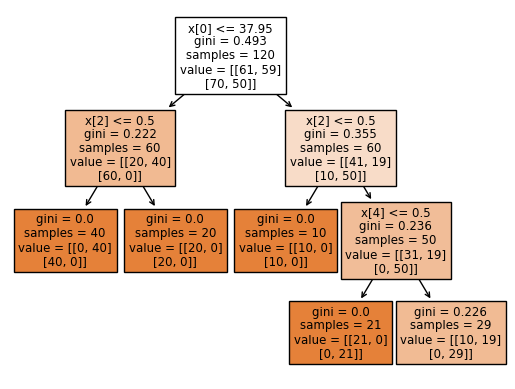

In [54]:
y=df.iloc[:,-2:]
X=df.iloc[:,:-2]

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
dtree.fit(X,y)
y_pred= dtree.predict(X)
print(type(dtree))
accuracy_score(y,y_pred)
tree.plot_tree(dtree, filled=True)

### (c) Convert the decision rules

In [55]:
def tree_conditions(datapoint):
    att1,att2,att3,att4,att5,att6=datapoint.ravel()[:-2]
    if att1<=37.5:
        if att3<=0.5:
            if att5<=0.5:
                print("Inflammation:","no    || Nephritis:","no")
            else:
                print("Inflammation:","yes   || Nephritis:","no" )  
        else:
            print("Inflammation:","yes   || Nephritis:","yes" )
            
        
    else:
        if att3<=0.5:
            print("Inflammation:","yes   || Nephritis:","yes" )
        else:
            print("Inflammation:","no    || Nephritis:","yes" )
            
print(tree_conditions(df.iloc[1]))    


Inflammation: yes   || Nephritis: no
None


In [56]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

    
tree_to_code(dtree, df.columns[0:6])

def tree(temp, nausea, l_pain, urine, m_pain, burn):
  if temp <= 37.95000076293945:
    if l_pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if l_pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if temp > 37.95000076293945
    if l_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if l_pain > 0.5
      if m_pain <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if m_pain > 0.5
        return [[10. 19.]
 [ 0. 29.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.


In [57]:
dtree = DecisionTreeClassifier(random_state=1)

dtree.fit(X, y)

ccp_path = dtree.cost_complexity_pruning_path(X, y)
ccp_alphas = ccp_path.ccp_alphas

pr_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X, y)
    pr_trees.append(pruned_tree)

acc = []
for tree in pr_trees:
    y_pred = tree.predict(X)
    acc.append(np.mean(y_pred == y))

opt_tree = pr_trees[np.argmax(acc)]


opt_tree.fit(X, y)


tree_to_code(opt_tree, df.columns[0:6])

def tree(temp, nausea, l_pain, urine, m_pain, burn):
  if temp <= 37.95000076293945:
    if l_pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if l_pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if temp > 37.95000076293945
    if l_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if l_pain > 0.5
      if m_pain <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if m_pain > 0.5
        if urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\A

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [58]:

col_names = []
file = open("../data/communities.names")
for line in file:
    if "@attribute" in line:
        line = line.split(" ")
        col_names.append(line[1])
        
print("total #columns",len(column))

df = pd.read_csv("../data/communities.data",names=column,header=None).replace("?",np.nan)
X_train,y_train=df.iloc[:1495,5:-1],df.iloc[:1495,-1]
X_test,y_test=df.iloc[1495:,5:-1],df.iloc[1495:,-1]


total #columns 128


In [59]:
print(type(X_train.iloc[0,1]))
X_train.head()

<class 'numpy.float64'>


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


In [60]:
X_test.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,NaN,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.0,NaN
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,NaN,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.0,NaN
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,NaN,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.0,NaN
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,NaN,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.0,NaN
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,NaN,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.0,NaN


### (b) Missing values

In [61]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train_imp =pd.DataFrame(imp.transform(X_train))
X_train_imp.columns = col_names[5:-1]
X_test_imp =pd.DataFrame(imp.transform(X_test))
X_test_imp.columns = col_names[5:-1]

### (c) Plot a correlation matrix

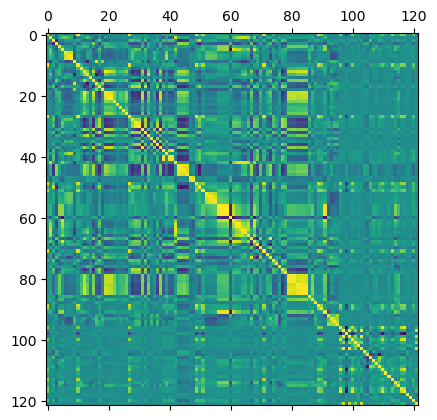

In [62]:
corr_mat=X_train_imp.corr()
plt.matshow(corr_mat)

### (d) Calculate the Coefficient of Variation CV

In [63]:

cv_vals = X_train_imp.apply(lambda x:np.std(x)/np.mean(x))
thresh = sorted(X_train_imp.apply(lambda x:np.std(x)/np.mean(x)))[-int(math.sqrt(len(X_train_imp.columns)))]

a=[]
for i,val in enumerate(cv_vals):
    if val>thresh:
        a.append(X_train_imp.columns[i])
cv_vals = pd.DataFrame([X_train_imp.apply(lambda x:np.std(x)/np.mean(x))],columns=X_train_imp.columns)

highest_cvs = X_train_imp.loc[:,a]
highest_cvs 

,population,numbUrban,NumUnderPov,NumIlleg,NumImmig,HousVacant,NumInShelters,NumStreet,LandArea,LemasPctOfficDrugUn
0,0.19,0.20,0.08,0.04,0.03,0.21,0.04,0.00,0.12,0.32
1,0.00,0.02,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00
2,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00
3,0.04,0.06,0.01,0.03,0.02,0.01,0.00,0.00,0.02,0.00
4,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00
1491,0.16,0.18,0.08,0.04,0.15,0.06,0.09,0.03,0.07,0.61
1492,0.01,0.00,0.04,0.03,0.00,0.05,0.00,0.00,0.03,0.00
1493,0.06,0.07,0.01,0.00,0.01,0.02,0.00,0.00,0.08,0.00


### (e) Scatter plots and box plots for highest CV features

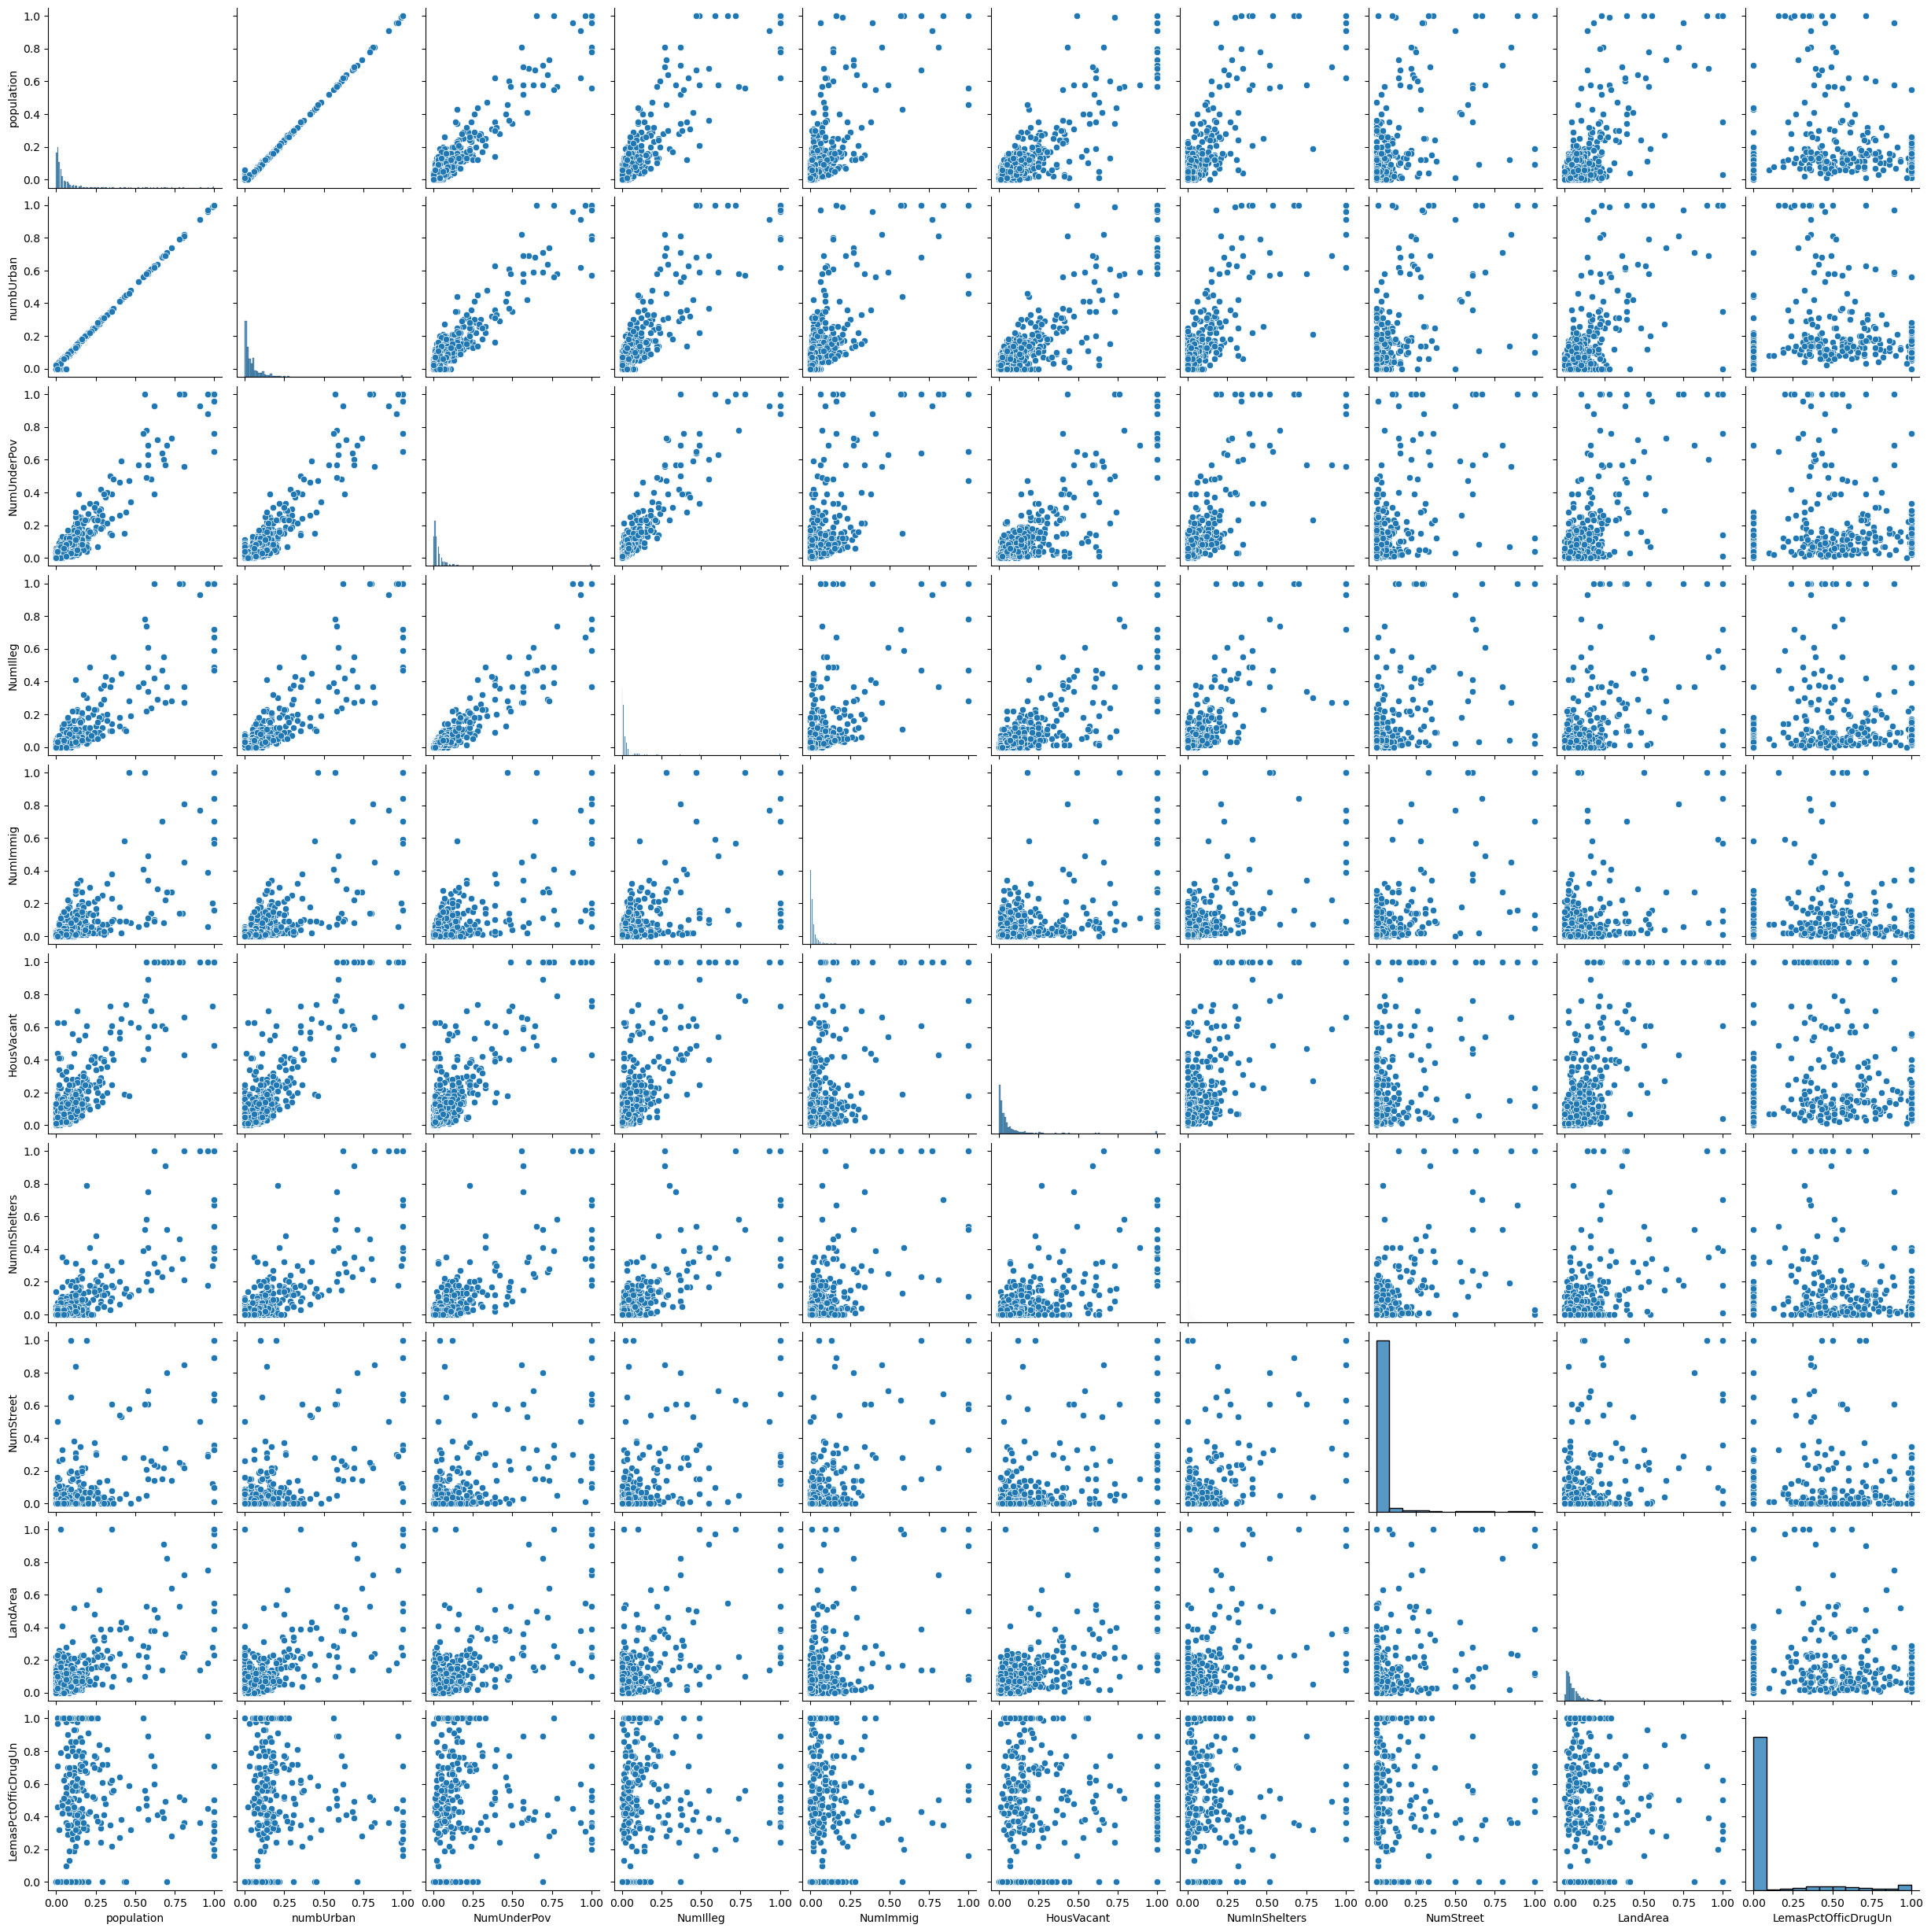

In [64]:
sns.pairplot(highest_cvs)

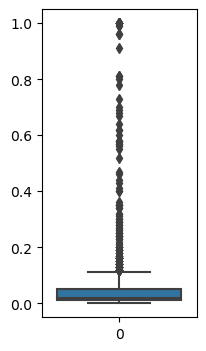

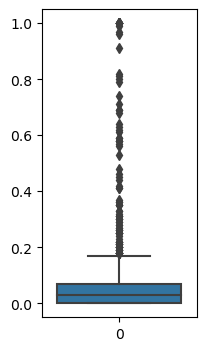

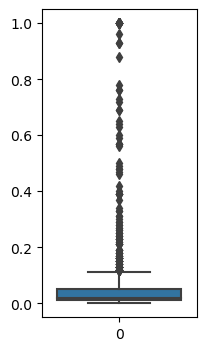

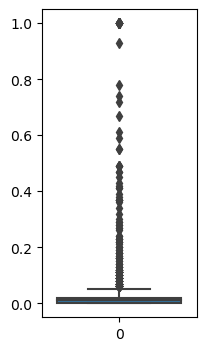

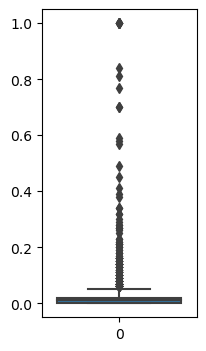

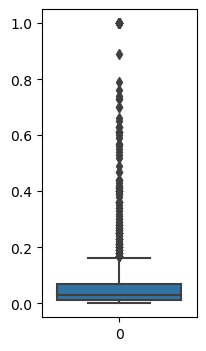

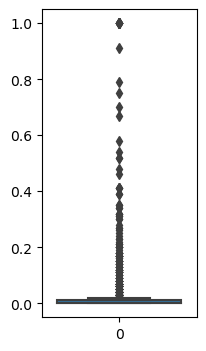

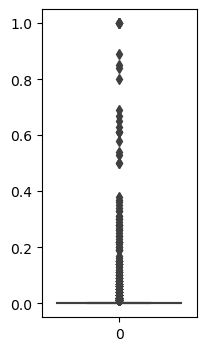

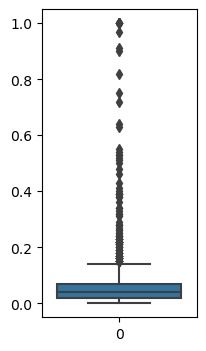

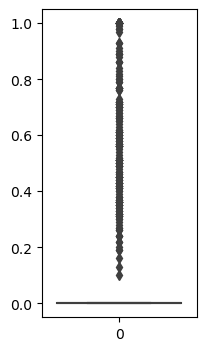

In [65]:
for i in highest_cvs:
    plt.figure(figsize=(2, 4))
    sns.boxplot(highest_cvs.loc[:,i])
    plt.show()

### (f) Fit a linear model

In [66]:
X_train_const = sm.add_constant(X_train_imp)
X_test_const = sm.add_constant(X_test_imp)
lreg = sm.OLS(y_train, X_train_const).fit()
pred = lreg.predict(X_test_const)
display(lreg.summary())
mse_train = mean_squared_error(y_test, pred)
print(f"\n\n MSE Train Error: {mse_train}")


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Fri, 24 Mar 2023   Prob (F-statistic):          6.56e-291
Time:                         23:08:08   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4544      0.904      0.503      0.615      -1.319       2.228
population               -0.0199      0.477     -0.042      0.967      -0.955       0.916
householdsize            -0.0157      0.098     -0.161      0.872      -0.207       0.176
racepctblack              0.2848      0.060      4.754      0.000       0.167       0.402
racePctWhite              0.0106      0.067      0.159      0.874      -0.120       0.141
racePctAsian             -0.0278      0.041     -0.670      0.503      -0.109       0.054
racePctHisp               0.0180      0.065      0.275      0.784      -0.110       0.146
agePct12t21               0.1792      0.129      1.387      0.166      -0.074       0.433
agePct12t29              -0.3451      0.186     -1.858      0.063      -0.709       0.019
agePct16t24              -0.1237      0.198     -0.626      0.531      -0.511       0.264
agePct65up                0.0597      0.124      0.481      0.630      -0.184       0.303
numbUrban                -0.1260      0.465     -0.271      0.786      -1.038       0.786
pctUrban                  0.0484      0.019      2.581      0.010       0.012       0.085
medIncome                -0.1784      0.202     -0.881      0.378      -0.575       0.219
pctWWage                 -0.1399      0.107     -1.309      0.191      -0.350       0.070
pctWFarmSelf              0.0460      0.023      1.960      0.050   -3.35e-05       0.092
pctWInvInc               -0.2031      0.081     -2.505      0.012      -0.362      -0.044
pctWSocSec                0.1368      0.125      1.092      0.275      -0.109       0.383
pctWPubAsst               0.0601      0.054      1.109      0.268      -0.046       0.166
pctWRetire               -0.1249      0.045     -2.802      0.005      -0.212      -0.037
medFamInc                 0.3049      0.189      1.617      0.106      -0.065       0.675
perCapInc                -0.0485      0.222     -0.219      0.827      -0.484       0.387
whitePerCap              -0.1923      0.179     -1.072      0.284      -0.544       0.160
blackPerCap              -0.0401      0.030     -1.358      0.175      -0.098       0.018
indianPerCap             -0.0436      0.023     -1.911      0.056      -0.088       0.001
AsianPerCap               0.0301      0.022      1.381      0.168      -0.013       0.073
OtherPerCap               0.0304      0.022      1.364      0.173      -0.013       0.074
HispPerCap                0.0330      0.029      1.150      0.250      -0.023       0.089
NumUnderPov               0.0737      0.192      0.383      0.702      -0.303       0.451
PctPopUnderPov           -0.2035      0.074     -2.736      0.006      -0.349      -0.058
PctLess9thGrade          -0.0584      0.079     -0.743      0.457      -0.213       0.096
PctNotHSGrad



 MSE Train Error: 0.018141971135530153


### (g) Fit a ridge regression model

In [67]:
alph=[math.exp(i) for i in range(-9,10,1)]
print(alph)
r_reg = RidgeCV(alphas=alph, cv=KFold(n_splits=5, random_state=1, shuffle=True))
r_reg.fit(X_train_imp, y_train)
print("Model info:", r_reg)

pred = r_reg.predict(X_test_imp)
opt_alpha = r_reg.alpha_
test_err = mean_squared_error(y_test,pred)
print(f"\nTest Error for ridge regression {test_err}")

[0.00012340980408667956, 0.00033546262790251185, 0.0009118819655545162, 0.0024787521766663585, 0.006737946999085467, 0.01831563888873418, 0.049787068367863944, 0.1353352832366127, 0.36787944117144233, 1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384]
Model info: RidgeCV(alphas=[0.00012340980408667956, 0.00033546262790251185,
                0.0009118819655545162, 0.0024787521766663585,
                0.006737946999085467, 0.01831563888873418, 0.049787068367863944,
                0.1353352832366127, 0.36787944117144233, 1.0, 2.718281828459045,
                7.38905609893065, 20.085536923187668, 54.598150033144236,
                148.4131591025766, 403.4287934927351, 1096.6331584284585,
                2980.9579870417283, 8103.083927575384],
        cv=KFold(n_splits=5, random_state=1, shuffle=True))

Test Error for ridge regression 0.017575964849568325


### (h) Fit a LASSO model

In [68]:
l1_reg = LassoCV(alphas = alph, cv = KFold(n_splits=5, random_state=1, shuffle=True))

l1_reg.fit(X_train_imp, y_train)
l1_pred = l1_reg.predict(X_test_imp)

l1_alpha = l1_reg.alpha_
l1_mse = mean_squared_error(y_test, l1_pred)

print(f"\n Error for Lasso Regression is {l1_mse} for chosen alpha {l1_alpha}")

count=0
for i,val in enumerate(X_train_imp):
    if l1_reg.coef_[i] != 0:
        print(f"{X_train_imp.columns[i]} : {l1_reg.coef_[i]}")
        count+=1
print(f"\n\n Total features selected {count}")


 Error for Lasso Regression is 0.017739862847109128 for chosen alpha 0.00012340980408667956
racepctblack : 0.2713824375030153
racePctAsian : -0.014594785446900752
agePct12t21 : 0.06079036601327291
agePct12t29 : -0.25207622188122125
pctUrban : 0.04033530117172154
pctWWage : -0.0808325019081292
pctWFarmSelf : 0.02566329045951969
pctWInvInc : -0.09581164617035019
pctWSocSec : 0.04518404976246563
pctWPubAsst : 0.037719653573456594
pctWRetire : -0.1071280936852574
whitePerCap : -0.056785695902109135
blackPerCap : -0.020678406644665203
indianPerCap : -0.030911267527007895
AsianPerCap : 0.028807331475364645
OtherPerCap : 0.02252636023590049
HispPerCap : 0.0229584065782025
PctPopUnderPov : -0.1391156435592228
PctLess9thGrade : -0.016454966288545547
PctEmploy : 0.1302868311492409
PctEmplManu : -0.014688370912309585
PctOccupManu : 0.00927011570776595
MalePctDivorce : 0.11408466519083499
MalePctNevMarr : 0.12560936354987198
FemalePctDiv : -0.07211416891181745
PctKids2Par : -0.1966984253415673
Pc

In [69]:
l1_norm_reg = LassoCV(alphas = alph, cv = KFold(n_splits=5, random_state=1, shuffle=True))
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_imp))
X_test_scale  = pd.DataFrame(scaler.fit_transform(X_test_imp))

l1_norm_reg.fit(X_train_scale, y_train)
l1_norm_pred = l1_norm_reg.predict(X_test_scale)

l1_norm_alpha = l1_norm_reg.alpha_
l1_norm_mse = mean_squared_error(y_test, l1_norm_pred)
print(f"\n Error for Lasso Regression on normalized data is {l1_norm_mse} for chosen alpha {l1_norm_alpha} \n ")

count=0
for i,val in enumerate(X_train_imp):
    if l1_norm_reg.coef_[i] != 0:
        print(f"{X_train_imp.columns[i]} : {l1_norm_reg.coef_[i]}")
        count+=1
print(f"\n Total features selected {count}")


 Error for Lasso Regression on normalized data is 0.017961318995178846 for chosen alpha 0.0009118819655545162 
 
racepctblack : 0.06728347656567332
agePct12t21 : 0.007437809374044757
agePct12t29 : -0.032338158328834375
pctUrban : 0.015958197551812683
pctWWage : -0.009646371759994372
pctWFarmSelf : 0.0033362998592049065
pctWInvInc : -0.019391587150960378
pctWSocSec : 0.007568504788085277
pctWPubAsst : 0.0044075718709936295
pctWRetire : -0.016241355175638184
whitePerCap : -0.005911486708601409
blackPerCap : -0.003311692955774753
indianPerCap : -0.005100988213619985
AsianPerCap : 0.005052700752957311
OtherPerCap : 0.0035779918561386547
HispPerCap : 0.0034250958160808934
PctPopUnderPov : -0.02296025551317005
PctLess9thGrade : -0.000694849217280938
PctEmploy : 0.016909245103530514
PctEmplManu : -0.00043573732872084444
MalePctDivorce : 0.01639961144531742
MalePctNevMarr : 0.016893672488679675
FemalePctDiv : -0.005214818431223706
PctKids2Par : -0.03956125298465523
PctYoungKids2Par : -0.00866

D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09070701206444909, tolerance: 0.006878343503344482
  model = cd_fast.enet_coordinate_descent_gram(
D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05827378875117972, tolerance: 0.006841585117056856
  model = cd_fast.enet_coordinate_descent_gram(
D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009897263811453172, tolerance: 0.006633882474916388
  model = cd_fast.enet_coordinate_descent_gram(
D:\AnacondaProjects\envs\DS_ML_38\lib\site-packages

### (i) Fit a PCR model

In [70]:
pcr_model = {}

for i in range(1,len(X_train_imp.columns) + 1):
    values=[]  
    pipeline = make_pipeline(PCA(n_components = i), LinearRegression(fit_intercept=True))
    values=cross_val_score(pipeline,X_train_imp,y_train,cv=7,scoring="neg_mean_squared_error")
    pcr_model[i]=sum(abs(values))/len(values)
    
    
err = min(pcr_model.values())
m = min(pcr_model, key=lambda x: pcr_model[x])
print(f" M :{m},  validation error : {err}.\n")

    

 M :96,  validation error : 0.019494300910267142.



In [71]:
pca = PCA(n_components = m).fit(X_train_imp)
X_train_pca = pca.transform(X_train_imp)
X_test_pca = pca.transform(X_test_imp)
X_train_pca = pca.transform(X_train_imp)

LR = LinearRegression().fit(X_train_pca, y_train)

pred_pca = LR.predict(X_test_pca)
pred_pca_train = LR.predict(X_train_pca)


pca_mse = mean_squared_error(y_test, pred_pca)
pca_mse_train = mean_squared_error(y_train, pred_pca_train)


print(f"Test  error for PCA with M:{m} is:{pca_mse}")
print(f"Train error for PCA with M:{m} is:{pca_mse_train}")

Test  error for PCA with M:96 is:0.0184719856014296
Train error for PCA with M:96 is:0.01660615347210234


### (j) Fit a boosting tree

In [73]:
params = {
    'learning_rate': [0.05, 0.1],
    'reg_alpha': np.logspace(-8, 8, num=15)
}


model_xgb = xgb.XGBRegressor(objective='reg:squarederror', subsample=0.5,random_state =50)
grid = GridSearchCV(model_xgb, params, cv=7)
grid.fit(X_train_imp, y_train)

print("Best parameters: ", grid.best_params_,"\n")
print("Best score: ", grid.best_score_,"\n")

opt_xgb = xgb.XGBRegressor(objective='reg:squarederror', subsample=0.5, colsample_bytree=0.5, **grid.best_params_)
opt_xgb.fit(X_train_imp, y_train)

xgb_pred = opt_xgb.predict(X_test_imp)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print("Test mean squared error for xgb is:",xgb_mse)

Best parameters:  {'learning_rate': 0.05, 'reg_alpha': 0.07196856730011514} 

Best score:  0.6467334907400211 

Test mean squared error for xgb is: 0.015776740132647828
